In [83]:
import numpy as np
import random
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Bidirectional,BatchNormalization
from keras.layers import LSTM, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split

import numpy as np
import os
from mido import MidiFile, MidiTrack, Message
import mido

from random import randrange
import NoteBins

import matplotlib.pyplot as plt

In [63]:
paths = []
songs = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\blues"):
    for file in f:
        if '.mid' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    mid = MidiFile(path, type = 1)
    songs.append(mid)

In [64]:
notes = []
dataset = []
fuckboy = []

In [65]:
#for each in midi object in list of songs
for i in range(len(songs)):
    #for each note in midi object
    for msg in songs[i]:
        #filtering out meta messages
        if not msg.is_meta:
            #filtering out control changes
            if (msg.type == 'note_on'):
                #normalizing note and velocity values
                notes.append([NoteBins.note_reg(msg.note)/11])
    for i in range(1, len(notes)):
        fuckboy.append(notes[i])
        if (i % 16 == 0):
            dataset.append(fuckboy)
            fuckboy = []
    fuckboy = []
    notes = []

In [66]:
dataset = np.array(dataset)
dataset.shape

(3569, 16, 1)

In [67]:
bruv = []
#for each in midi object in list of songs
for i in range(len(songs)):
    #for each note in midi object
    for msg in songs[i]:
        #filtering out meta messages
        if not msg.is_meta:
            #filtering out control changes
            if (msg.type == 'note_on'):
                #normalizing note and velocity values
                notes.append([NoteBins.note_reg(msg.note)/11])
    for i in range(1, len(notes)):
        fuckboy.append(notes[i])
        if (i % 16 == 0):
            bruv.append([fuckboy[0:4],fuckboy[4:8],fuckboy[8:12],fuckboy[12:16]])
            fuckboy = []
    fuckboy = []
    notes = []

In [68]:
bruv = np.array(bruv)
bruv = bruv.reshape(len(bruv),4,4)
bruv.shape

(3569, 4, 4)

In [69]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(bruv, dataset, test_size=0.4, shuffle=False, random_state=42)

In [106]:
# define model
model = Sequential()
#shaping input to match data
model.add(Bidirectional(LSTM(128),input_shape=(4, 4)))
#specifying output to have 40 timesteps
model.add(RepeatVector(16))
#specifying 1 feature as the output
model.add(Bidirectional(LSTM(256, activation = 'selu', return_sequences=True, dropout = 0.2)))
model.add(Bidirectional(LSTM(256, activation = 'relu', return_sequences=True, dropout = 0.2)))
model.add(Bidirectional(LSTM(256, activation = 'selu', return_sequences=True, dropout = 0.2)))
model.add(BatchNormalization())
model.add(TimeDistributed(Dense(512, activation = 'selu')))
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(512, activation = 'selu')))
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(512, activation = 'selu')))
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(1, activation = 'linear')))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_23 (Bidirectio (None, 256)               136192    
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 16, 256)           0         
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 16, 512)           1050624   
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 16, 512)           1574912   
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 16, 512)           1574912   
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 512)           2048      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 16, 512)          

In [114]:
history = model.fit(x_train, y_train, epochs=100, batch_size=2500, verbose=1,validation_data=(x_test, y_test))

Train on 2141 samples, validate on 1428 samples
Epoch 1/100
2141/2141 [==============================] - 0s 231us/step - loss: 1.3175 - val_loss: 0.1611
Epoch 2/100
2141/2141 [==============================] - 0s 207us/step - loss: 1.2683 - val_loss: 0.1578
Epoch 3/100
2141/2141 [==============================] - 0s 209us/step - loss: 1.1927 - val_loss: 0.1554
Epoch 4/100
2141/2141 [==============================] - 0s 207us/step - loss: 1.1879 - val_loss: 0.1537
Epoch 5/100
2141/2141 [==============================] - 0s 206us/step - loss: 1.1629 - val_loss: 0.1508
Epoch 6/100
2141/2141 [==============================] - 0s 208us/step - loss: 1.1035 - val_loss: 0.1482
Epoch 7/100
2141/2141 [==============================] - 0s 206us/step - loss: 1.0719 - val_loss: 0.1440
Epoch 8/100
2141/2141 [==============================] - 0s 205us/step - loss: 1.0788 - val_loss: 0.1375
Epoch 9/100
2141/2141 [==============================] - 0s 210us/step - loss: 1.0238 - val_loss: 0.1317
Epoch 1

Epoch 78/100
2141/2141 [==============================] - 0s 207us/step - loss: 0.2729 - val_loss: 0.1076
Epoch 79/100
2141/2141 [==============================] - 0s 209us/step - loss: 0.2729 - val_loss: 0.1072
Epoch 80/100
2141/2141 [==============================] - 0s 207us/step - loss: 0.2665 - val_loss: 0.1068
Epoch 81/100
2141/2141 [==============================] - 0s 209us/step - loss: 0.2674 - val_loss: 0.1066
Epoch 82/100
2141/2141 [==============================] - 0s 208us/step - loss: 0.2607 - val_loss: 0.1063
Epoch 83/100
2141/2141 [==============================] - 0s 207us/step - loss: 0.2561 - val_loss: 0.1059
Epoch 84/100
2141/2141 [==============================] - 0s 208us/step - loss: 0.2530 - val_loss: 0.1055
Epoch 85/100
2141/2141 [==============================] - 0s 207us/step - loss: 0.2508 - val_loss: 0.1051
Epoch 86/100
2141/2141 [==============================] - 0s 207us/step - loss: 0.2472 - val_loss: 0.1045
Epoch 87/100
2141/2141 [======================

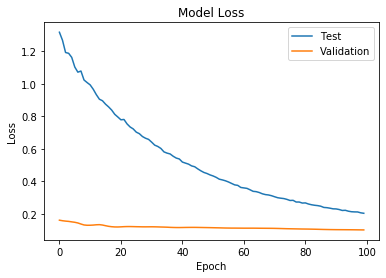

In [115]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [118]:
fuckie = [[[randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000)], [randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000)], [randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000)], [randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000),randrange(-1000,1000)]]]
fuckie = np.array(fuckie)
fuckie.reshape(1,4,4)

jamie = model.predict_on_batch(fuckie)
#adjusting from normalization
for x in range(12):
    jamie[0][x][0] = abs(jamie[0][x][0] * 11)
    while(jamie[0][x][0] > 127):
        jamie[0][x][0] = jamie[0][x][0] / 10

In [119]:
timing = np.load('csp.npy',allow_pickle=True)
count = 0
mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)
track2 = MidiTrack()
mid.tracks.append(track2)
track3 = MidiTrack()
mid.tracks.append(track3)
track4 = MidiTrack()
mid.tracks.append(track4)
octave = 12 * 6
t = randrange(len(timing))

track.append(Message('program_change', program=7,time=0))
track2.append(Message('program_change', program=7, time=0))
track3.append(Message('program_change', program=7,time=0))
track4.append(Message('program_change', program=7, time=0))
    
for i in range(2):
    track2.append(Message('note_on', note= 58, velocity=randrange(70,80), time=0))
    track2.append(Message('note_off', note= 58, velocity=randrange(70,80), time=1920))
    track3.append(Message('note_on', note= 60, velocity=randrange(70,80), time=0))
    track3.append(Message('note_off', note= 60, velocity=randrange(70,80), time=1920))
    track4.append(Message('note_on', note= 62, velocity=randrange(70,80), time=0))
    track4.append(Message('note_off', note=62, velocity=randrange(70,80), time=1920))

    track2.append(Message('note_on', note= 57, velocity=randrange(70,80), time=0))
    track2.append(Message('note_off', note= 57, velocity=randrange(70,80), time=1920))
    track3.append(Message('note_on', note= 58, velocity=randrange(70,80), time=0))
    track3.append(Message('note_off', note= 58, velocity=randrange(70,80), time=1920))
    track4.append(Message('note_on', note= 60, velocity=randrange(70,80), time=0))
    track4.append(Message('note_off', note=60, velocity=randrange(70,80), time=1920))

    track2.append(Message('note_on', note= 55, velocity=randrange(70,80), time=0))
    track2.append(Message('note_off', note= 55, velocity=randrange(70,80), time=1920))
    track3.append(Message('note_on', note= 57, velocity=randrange(70,80), time=0))
    track3.append(Message('note_off', note= 57, velocity=randrange(70,80), time=1920))
    track4.append(Message('note_on', note= 58, velocity=randrange(70,80), time=0))
    track4.append(Message('note_off', note=58, velocity=randrange(70,80), time=1920))

    track2.append(Message('note_on', note= 53, velocity=randrange(70,80), time=0))
    track2.append(Message('note_off', note= 53, velocity=randrange(70,80), time=1920))
    track3.append(Message('note_on', note= 55, velocity=randrange(70,80), time=0))
    track3.append(Message('note_off', note= 55, velocity=randrange(70,80), time=1920))
    track4.append(Message('note_on', note= 57, velocity=randrange(70,80), time=0))
    track4.append(Message('note_off', note=57, velocity=randrange(70,80), time=1920))
for x in range(2):
    for i in range(16):
        if(i == 0):
            track.append(Message('note_on', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=randrange(90,110), time=0))
        else:
            track.append(Message('note_on', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=randrange(90,110), time=20))
        track.append(Message('note_off', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=randrange(90,110), time=timing[t].get(str(i))))
mid.save('jek.mid')

In [75]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('expanded.h5')

In [39]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("all.tflite", "wb").write(tflite_model)

AttributeError: type object 'TFLiteConverter' has no attribute 'from_keras_model'

In [ ]:
import tensorflow as tf
tf.__version__

In [61]:
predict = model.predict(bruv)

In [62]:
#adjusting from normalization
for y in range(len(songs)):
    for x in range(15):
            predict[y][x][0] = predict[y][x][0] * 11
            while(predict[y][x][0] > 127):
                predict[y][x][0] = predict[y][x][0] / 10

In [65]:
for z in range(1500,1524):
    mid = MidiFile()
    track = MidiTrack()
    mid.tracks.append(track)
    track2 = MidiTrack()
    mid.tracks.append(track2)
    track3 = MidiTrack()
    mid.tracks.append(track3)
    track4 = MidiTrack()
    mid.tracks.append(track4)
    octave = 12 * 5
    t = randrange(len(timing))

    track.append(Message('program_change', program=2,time=0))
    track2.append(Message('program_change', program=0, time=0))
    
    for i in range(2):
        track2.append(Message('note_on', note= 48, velocity=64, time=0))
        track2.append(Message('note_off', note= 48, velocity=64, time=1920))
        track3.append(Message('note_on', note= 50, velocity=64, time=0))
        track3.append(Message('note_off', note= 50, velocity=64, time=1920))
        track4.append(Message('note_on', note= 52, velocity=64, time=0))
        track4.append(Message('note_off', note=52, velocity=64, time=1920))

        track2.append(Message('note_on', note= 47, velocity=64, time=0))
        track2.append(Message('note_off', note= 47, velocity=64, time=1920))
        track3.append(Message('note_on', note= 48, velocity=64, time=0))
        track3.append(Message('note_off', note= 48, velocity=64, time=1920))
        track4.append(Message('note_on', note= 50, velocity=64, time=0))
        track4.append(Message('note_off', note=50, velocity=64, time=1920))

        track2.append(Message('note_on', note= 45, velocity=64, time=0))
        track2.append(Message('note_off', note= 45, velocity=64, time=1920))
        track3.append(Message('note_on', note= 47, velocity=64, time=0))
        track3.append(Message('note_off', note= 47, velocity=64, time=1920))
        track4.append(Message('note_on', note= 48, velocity=64, time=0))
        track4.append(Message('note_off', note=48, velocity=64, time=1920))

        track2.append(Message('note_on', note= 43, velocity=64, time=0))
        track2.append(Message('note_off', note= 43, velocity=64, time=1920))
        track3.append(Message('note_on', note= 45, velocity=64, time=0))
        track3.append(Message('note_off', note= 45, velocity=64, time=1920))
        track4.append(Message('note_on', note= 47, velocity=64, time=0))
        track4.append(Message('note_off', note=47, velocity=64, time=1920))
    for x in range(3):
        for i in range(12):
            track.append(Message('note_on', note= octave + NoteBins.note_reg(int(predict[z][i][0])), velocity=64, time=20))
            track.append(Message('note_off', note= octave + NoteBins.note_reg(int(predict[z][i][0])), velocity=64, time=timing[t].get(str(i))))
    mid.save('test' + str(z) + '.mid')

In [64]:
predict

array([[[5.620357  ],
        [5.600093  ],
        [5.56239   ],
        ...,
        [5.4134326 ],
        [5.4159575 ],
        [0.4930788 ]],

       [[5.6203566 ],
        [5.600094  ],
        [5.562388  ],
        ...,
        [5.413438  ],
        [5.415968  ],
        [0.4930799 ]],

       [[5.620356  ],
        [5.600092  ],
        [5.5623827 ],
        ...,
        [5.4134274 ],
        [5.4159474 ],
        [0.49307746]],

       ...,

       [[0.51094157],
        [0.50909966],
        [0.50567216],
        ...,
        [0.49213105],
        [0.4923614 ],
        [0.49308082]],

       [[0.5109415 ],
        [0.5090991 ],
        [0.5056712 ],
        ...,
        [0.4921301 ],
        [0.49235952],
        [0.49307835]],

       [[0.5109415 ],
        [0.50909925],
        [0.5056713 ],
        ...,
        [0.49213016],
        [0.49235964],
        [0.4930785 ]]], dtype=float32)